In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
from mlxtend.plotting import scatterplotmatrix

In [4]:
#from google.colab import drive 
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
#df=pd.read_csv('gdrive/My Drive/FinalList.csv')

df = pd.read_csv('FinalList.csv')
df

,ID,Fuel,Class,Sub-Class,Group,BP2,Uncertainty,Source,SMILES,BP,Molecular Formula,N_Atoms,MW,IC0,PJ3,SIC0,GATS1v,Wiener,Z1,HOMO,LUMO,DM,EI,CP,H,BalabanJ,CIC3,GGI4,JGI1,Mor10v,Mor16se,GRAVH,HBondA,HBondD,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
0,1,"1,3,5-trimethylbenzene",Hydrocarbons,Aromatic hydrocarbons,Monocyclic aromatic hydrocarbons,437.908,0.182452,NIST,Cc1cc(C)cc(C)c1,437.872222,C9H12,21,120.195,0.985228,0.318633,0.224307,1.111111,84,42,-0.227243,0.009793,0.037601,0.237036,-0.108725,0.024935,2.340852,2.264232,0.333333,0.333333,0.036857,0.507004,1308.111489,0,0,0,6,119.007881,0.810185,0.023771,-1.532920,-4.779854,58.506429,0.142741,0.128051
1,2,1-Butene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,266.844,0.244792,NIST,CCC=C,267.038889,C4H8,12,56.108,0.918296,0.363684,0.256152,1.500000,10,10,-0.249853,0.025890,0.336790,0.275743,-0.111982,0.022738,1.974745,0.729574,0.000000,0.166667,0.007181,0.014358,393.448663,0,0,0,0,97.357465,1.260417,0.026443,-1.232569,-5.459298,16.143384,0.192906,0.349211
2,3,1-Pentene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,303.102,0.065615,NIST,CCCC=C,303.038889,C5H10,15,70.135,0.918296,0.372016,0.235045,1.500000,20,14,-0.249613,0.025174,0.328765,0.274786,-0.112219,0.022915,2.190610,0.716993,0.000000,0.125000,0.051929,0.047339,545.352707,0,0,0,0,128.152792,1.312500,0.026643,-1.308787,-5.161937,25.164912,0.163565,0.296013
3,4,"2,3-Dimethylpentane",Hydrocarbons,Aliphatic hydrocarbons,Alkanes,362.941,0.395675,NIST,CCC(C)C(C)C,363.150000,C7H16,23,100.205,0.886541,0.454902,0.195983,1.642857,46,26,-0.296727,0.086465,0.056010,0.383192,-0.105131,0.014422,3.144208,1.621053,0.000000,0.333333,0.107795,0.221296,921.041855,0,0,0,0,185.939758,1.183248,0.019681,-1.059327,-3.541765,58.142762,0.077032,0.165887
4,5,"2,5-dimethylhexane",Hydrocarbons,Aliphatic hydrocarbons,Alkanes,382.231,0.067620,NIST,CC(C)CCC(C)C,382.261111,C8H18,26,114.232,0.890492,0.374392,0.189449,1.625000,74,30,-0.299486,0.081422,0.078138,0.380908,-0.109032,0.015605,2.927819,2.500752,0.320000,0.357143,0.049435,0.468037,1079.890676,0,0,0,0,207.363945,1.222512,0.019948,-1.227298,-3.733328,65.151442,0.066477,0.140495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,321,trans-2-hexene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,341.005,0.014359,NIST,CCC/C=C/C,341.020000,C6H12,18,84.162,0.918296,0.444471,0.220219,1.500000,35,18,-0.234908,0.031407,0.075640,0.266315,-0.101751,0.019438,2.339092,0.750543,0.080000,0.100000,0.036104,0.028575,690.835258,0,0,0,0,157.041260,1.275000,0.023728,-1.179628,-4.126941,32.183671,0.150380,0.240837
321,322,trans-crotonic acid,Carboxylic acids and salts,Aliphatic carboxylic acids,Alkenylcarboxylic acids,455.644,1.544870,NIST,C/C=C/C(O)=O,458.150000,C4H6O2,12,86.090,1.459148,0.484704,0.407019,1.147885,32,20,-0.270364,-0.039951,1.794456,0.230412,-0.155157,0.052241,2.627215,0.396241,0.000000,0.300000,-0.045367,0.122477,796.075482,1,1,2,0,14.829893,0.720190,0.045617,-7.854970,-31.651760,15.531601,0.384312,0.561076
322,323,trimethylamine,Amines,Aliphatic amines,Tertiary aliphatic amines,276.068,0.240339,NIST,CN(C)C,276.020000,C3H9N,13,59.112,1.140116,0.492330,0.308103,1.934765,9,12,-0.207317,0.084171,0.575520,0.291488,-0.061573,0.006503,2.323790,2.560324,0.000000,0.500000,-0.077989,0.080963,462.278317,1,0,1,0,109.058920,1.176416,0.029365,-0.763550,-3.439881,20.043798,0.111111,0.881493
323,324,valeraldehyde,Aldehydes,Aliphatic aldehydes,Alkyl aldehydes,375.811,0.150969,NIST,CCCCC=O,376.150000,C5H10O,16,86.134,1.198192,0.491967,0.299548,1.491124,35,18,-0.249278,-0.020957,2.883166,0.228321,-0.135117,0.039980,2.339092,0.672180,0.080000,0.100000,0.060418,0.270536,721.261764,1,0,1,0,121.591801,1.154950,0.029459,-4.750226,-17.386313,28.463014,0.253451,0.643550


In [6]:
# df.drop(['ID','Fuel','Molecular Formula','SMILES','Class','Sub-Class','Group','Uncertainty','Source','BP'],axis = 1,inplace = True)
# df.head()

,BP2,N_Atoms,MW,IC0,PJ3,SIC0,GATS1v,Wiener,Z1,HOMO,LUMO,DM,EI,CP,H,BalabanJ,CIC3,GGI4,JGI1,Mor10v,Mor16se,GRAVH,HBondA,HBondD,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
0,437.908,21,120.195,0.985228,0.318633,0.224307,1.111111,84,42,-0.227243,0.009793,0.037601,0.237036,-0.108725,0.024935,2.340852,2.264232,0.333333,0.333333,0.036857,0.507004,1308.111489,0,0,0,6,119.007881,0.810185,0.023771,-1.532920,-4.779854,58.506429,0.142741,0.128051
1,266.844,12,56.108,0.918296,0.363684,0.256152,1.500000,10,10,-0.249853,0.025890,0.336790,0.275743,-0.111982,0.022738,1.974745,0.729574,0.000000,0.166667,0.007181,0.014358,393.448663,0,0,0,0,97.357465,1.260417,0.026443,-1.232569,-5.459298,16.143384,0.192906,0.349211
2,303.102,15,70.135,0.918296,0.372016,0.235045,1.500000,20,14,-0.249613,0.025174,0.328765,0.274786,-0.112219,0.022915,2.190610,0.716993,0.000000,0.125000,0.051929,0.047339,545.352707,0,0,0,0,128.152792,1.312500,0.026643,-1.308787,-5.161937,25.164912,0.163565,0.296013
3,362.941,23,100.205,0.886541,0.454902,0.195983,1.642857,46,26,-0.296727,0.086465,0.056010,0.383192,-0.105131,0.014422,3.144208,1.621053,0.000000,0.333333,0.107795,0.221296,921.041855,0,0,0,0,185.939758,1.183248,0.019681,-1.059327,-3.541765,58.142762,0.077032,0.165887
4,382.231,26,114.232,0.890492,0.374392,0.189449,1.625000,74,30,-0.299486,0.081422,0.078138,0.380908,-0.109032,0.015605,2.927819,2.500752,0.320000,0.357143,0.049435,0.468037,1079.890676,0,0,0,0,207.363945,1.222512,0.019948,-1.227298,-3.733328,65.151442,0.066477,0.140495


# Visualize the data 

In [7]:
bp_dat = df['BP2']
print('Minimum boiling point value (K): ', bp_dat.min())
print('Maximum boiling point value (K): ', bp_dat.max())

bp_dat.describe()

Minimum boiling point value (K):  111.667
Maximum boiling point value (K):  655.803


count    325.00000
mean     392.79946
std       82.50687
min      111.66700
25%      338.16500
50%      387.13700
75%      443.71400
max      655.80300
Name: BP2, dtype: float64

[Text(0.5, 1.0, 'Distribution of Observed Normal Boiling Point Values')]

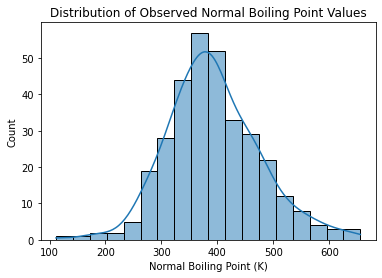

In [8]:
ax = sns.histplot(data=df, x='BP2', kde=True)
ax.set(xlabel='Normal Boiling Point (K)')
ax.set(title='Distribution of Observed Normal Boiling Point Values')

# Correlation matrix containing the Pearson product-moment correlation coefficients

In [9]:
# from mlxtend.plotting import heatmap
# from matplotlib.pyplot import figure

# names = ['BP','N_Atoms','MW','IC0','PJ3','SIC0','GATS1v','Wiener','Z1','HOMO','LUMO','DM','EI','CP','H','BalabanJ','CIC3','GGI4','JGI1','Mor10v','Mor16se']
# cm = np.corrcoef(df[names].values.T) #P - measures the linear dependence between pairs of features
# hm = heatmap(cm,
#              figsize =(12,12),
#              row_names = names,
#              column_names = names)

# plt.show()

# Drop unnecessary variables

In [10]:
# keep = ['BP2',
#  'Wiener',
#  'WNSA3',
#  'Mor16se',
#  'AromaticR',
#  'GATS1v',
#  'Mor10v',
#  'RNCG',
#  'SIC0',
#  'LUMO',
#  'BalabanJ',
#  'HBondD',
#  'JGI1',
#  'HOMO',
#  'FPSA3']
keep = ['BP2','Wiener','WNSA3','GATS1v','DM','BalabanJ','HBondD']
df2 = df[keep]
df2

,BP2,Wiener,WNSA3,GATS1v,DM,BalabanJ,HBondD
0,437.908,84,-1.532920,1.111111,0.037601,2.340852,0
1,266.844,10,-1.232569,1.500000,0.336790,1.974745,0
2,303.102,20,-1.308787,1.500000,0.328765,2.190610,0
3,362.941,46,-1.059327,1.642857,0.056010,3.144208,0
4,382.231,74,-1.227298,1.625000,0.078138,2.927819,0
...,...,...,...,...,...,...,...
320,341.005,35,-1.179628,1.500000,0.075640,2.339092,0
321,455.644,32,-7.854970,1.147885,1.794456,2.627215,1
322,276.068,9,-0.763550,1.934765,0.575520,2.323790,0
323,375.811,35,-4.750226,1.491124,2.883166,2.339092,0


In [11]:
# xvars=[
#  'WNSA3',
#  'Mor16se',
#  'AromaticR',
#  'GATS1v',
#  'Mor10v',
#  'RNCG',
#  'SIC0',
#  'LUMO',
#  'BalabanJ',
#  'HBondD',
#  'JGI1']
# sns.pairplot(df,x_vars=xvars,y_vars = 'BP2')

# Use 80% of data for training, 20% for testing

In [12]:
from sklearn.model_selection import train_test_split

x = df2.drop(['BP2'],axis = 1).to_numpy()
y = df2['BP2'].values
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

# Multiple Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

slr = LinearRegression()

steps0 = [('scaler', MinMaxScaler()), ('MLR', slr)]
pipeline0 = Pipeline(steps0)

In [19]:
pipeline0.fit(x_train,y_train)
y_train_pred = pipeline0.predict(x_train)
y_test_pred = pipeline0.predict(x_test)

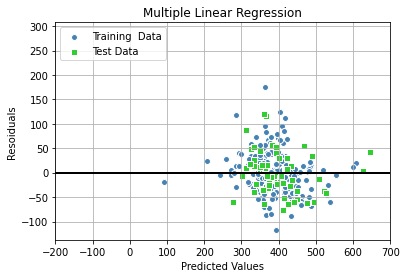

In [20]:
plt.scatter(y_train_pred,y_train_pred-y_train,
             c ='steelblue', marker = 'o', edgecolor = 'white',
             label = 'Training  Data')
            
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',marker = 's', edgecolor = 'white',
            label ='Test Data')

plt.xlabel('Predicted Values')
plt.ylabel('Resoiduals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin= -200, xmax = 700, color='black',lw=2)
plt.xlim([-200,700])
plt.title('Multiple Linear Regression')
plt.grid()
plt.show()
#plots the residuals: differences or vertical distances between the actual and predicted values
#plots residuals vs the predicted values

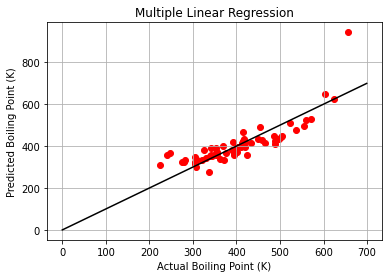

In [21]:
plt.scatter(y_test,y_test_pred,color='red')
plt.xlabel('Actual Boiling Point (K)')
plt.ylabel('Predicted Boiling Point (K)')
plt.grid()
plt.title('Multiple Linear Regression')
plt.plot(range(700), range(700),'k')

In [22]:
from sklearn.metrics import mean_squared_error

print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train,y_train_pred,squared=False),
        mean_squared_error(y_test, y_test_pred,squared=False)))

#overfitting the data

RMSE train: 41.555, test: 54.965


In [23]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %
       (r2_score(y_train,y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.726, test: 0.647


# Support Vector Machine

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold
param_grid={
            'SVR__C': [100,150,200,250,290,300,310,350,375,380,400,430],
            'SVR__gamma': ['auto','scale',.001,.1,10],
            #'SVR__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'SVR__kernel': ['rbf']}
#             'SVR__degree' : [2,3,4,5,6,7], #Only applies to poly
#             'SVR__coef0' : [0.01,0.02,0.1,0.2,0.3,0.4]} #only applies to poly and sigmoid

steps1 = [('scaler', MinMaxScaler()),('SVR', SVR())]
pipeline1 = Pipeline(steps1)

grid =GridSearchCV(pipeline1,param_grid,cv=KFold(n_splits=10, shuffle=True, random_state=9),
                   n_jobs=-1, verbose=2,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)


Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=9, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVR', SVR())]),
             n_jobs=-1,
             param_grid={'SVR__C': [100, 150, 200, 250, 290, 300, 310, 350, 375,
                                    380, 400, 430],
                         'SVR__gamma': ['auto', 'scale', 0.001, 0.1, 10],
                         'SVR__kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print(grid.best_params_)
print('Mean test score: %.3f' % (grid.best_score_))

{'SVR__C': 430, 'SVR__gamma': 'scale', 'SVR__kernel': 'rbf'}
Mean test score: -1053.369


In [ ]:
y_train_pred2 = grid.predict(x_train)
y_test_pred2 = grid.predict(x_test) 
 
print('R^2 train: %.3f, test: %.3f' %
       (r2_score(y_train,y_train_pred2),
        r2_score(y_test, y_test_pred2)))

R^2 train: 0.891, test: 0.868


In [ ]:
from sklearn.metrics import mean_squared_error

print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train,y_train_pred2,squared=False),
        mean_squared_error(y_test, y_test_pred2,squared=False)))

RMSE train: 26.179, test: 33.643


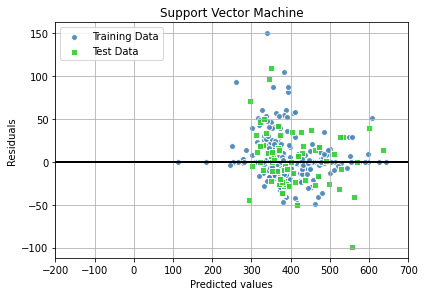

In [ ]:
plt.scatter(y_train_pred2,
            y_train_pred2 - y_train,
            c= 'steelblue',
            edgecolor = 'white',
            marker = 'o',
            s = 35,
            alpha = 0.9,
            label = 'Training Data')

plt.scatter(y_test_pred2,
            y_test_pred2 - y_test,
            c = 'limegreen',
            edgecolor = 'white',
            marker = 's',
            s=35,
            alpha = 0.9,
            label = 'Test Data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-200,xmax=700,lw=2,color='black')
plt.xlim([-200,700])
plt.tight_layout()
plt.grid()
plt.title('Support Vector Machine')
plt.show()

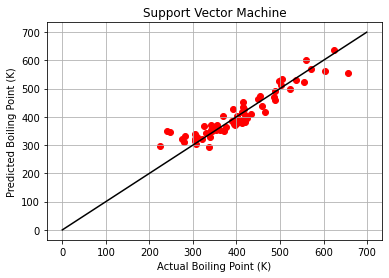

In [ ]:
plt.scatter(y_test,y_test_pred2,color='red')
plt.xlabel('Actual Boiling Point (K)')
plt.ylabel('Predicted Boiling Point (K)')
plt.grid()
plt.title('Support Vector Machine')
plt.plot(range(700), range(700),'k')

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

param_grid2 = {
    "n_estimators" : [50,60,65,70,75,100,120,130,350],
    "max_features" : ["auto", "sqrt", "log2"],
    "min_samples_split": [2,3,4,5,8],
    "bootstrap": [True, False]}
    

grid2 = GridSearchCV(RandomForestRegressor(random_state=0),param_grid2,
                     cv=KFold(n_splits=10, shuffle=True, random_state=9),n_jobs=-1, verbose=2,scoring='neg_mean_squared_error')
grid2.fit(x_train,y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  6.2min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=9, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_es...None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=Fals

In [47]:
print(grid2.best_params_)
print('Mean test score: %.3f' % (grid2.best_score_))

{'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 350}
Mean test score: -361.710


In [48]:
y_train_pred3= grid2.predict(x_train)
y_test_pred3 = grid2.predict(x_test) 
print('R^2 train: %.3f, test: %.3f' %
       (r2_score(y_train,y_train_pred3),
        r2_score(y_test, y_test_pred3)))

R^2 train: 0.991, test: 0.958


In [54]:
from sklearn.metrics import mean_squared_error

print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train,y_train_pred3,squared=False),
        mean_squared_error(y_test, y_test_pred3,squared=False)))

RMSE train: 7.486, test: 19.050


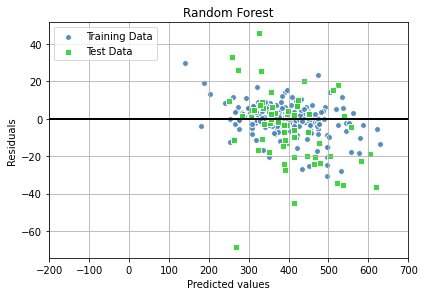

In [50]:
plt.scatter(y_train_pred3,
            y_train_pred3 - y_train,
            c= 'steelblue',
            edgecolor = 'white',
            marker = 'o',
            s = 35,
            alpha = 0.9,
            label = 'Training Data')

plt.scatter(y_test_pred3,
            y_test_pred3 - y_test,
            c = 'limegreen',
            edgecolor = 'white',
            marker = 's',
            s=35,
            alpha = 0.9,
            label = 'Test Data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-200,xmax=700,lw=2,color='black')
plt.xlim([-200,700])
plt.tight_layout()
plt.grid()
plt.title('Random Forest')
plt.show()

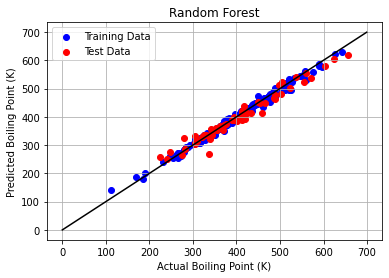

In [51]:
plt.scatter(y_train,y_train_pred3,color='blue',label='Training Data')
plt.scatter(y_test,y_test_pred3,color='red',label='Test Data')
plt.xlabel('Actual Boiling Point (K)')
plt.ylabel('Predicted Boiling Point (K)')
plt.legend(loc='upper left')
plt.grid()
plt.title('Random Forest')
plt.plot(range(700), range(700),'k')

In [57]:
res_test0 =y_test_pred3-y_test
res_test0= res_test0.tolist()
list_of_tuples0 = list(zip(res_test0,y_test))
outliers0 = pd.DataFrame(list_of_tuples0,columns=['Residuals','Actual BP'])
outliers0

,Residuals,Actual BP
0,6.362363,353.15000
1,-1.279516,371.53889
2,9.021309,325.47400
3,-4.339994,560.02700
4,-10.606694,344.93600
...,...,...
60,14.333791,341.21900
61,1.752971,537.46500
62,-34.052597,555.88100
63,25.844486,304.76400


In [59]:
outliers0.loc[outliers0.Residuals<-60]

,Residuals,Actual BP
11,-68.596715,337.632


In [60]:
df.loc[df.BP2==337.632]

,ID,Fuel,Class,Sub-Class,Group,BP2,Uncertainty,Source,SMILES,BP,Molecular Formula,N_Atoms,MW,IC0,PJ3,SIC0,GATS1v,Wiener,Z1,HOMO,LUMO,DM,EI,CP,H,BalabanJ,CIC3,GGI4,JGI1,Mor10v,Mor16se,GRAVH,HBondA,HBondD,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG


# XGBoost

In [13]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold

param_grid3 = {
    "colsample_bytree" : [.3,.4,.5,.6,.7,.8],
    "learning_rate" : [.1, .2, .3],
    "n_estimators": [100,150,200,230,250,260,300,320,350,410],
    "max_depth": [3,5,7,9],
    "alpha": [4,5,6,7,8,10,20],
     "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}

grid3 = RandomizedSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'),param_grid3,n_jobs=-1,
                     cv=KFold(n_splits=10, shuffle=True, random_state=9), verbose=2,scoring='neg_mean_squared_error')
grid3.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=9, shuffle=True),
                   error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          obj...
                   param_distributions={'alpha': [4, 5, 6, 7, 8, 10, 20],
                                        'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                        

In [24]:
print(grid3.best_params_)
print('Mean test score: %.3f' % (grid3.best_score_) )

{'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7, 'alpha': 7}
Mean test score: -297.633


In [25]:
y_train_pred4 = grid3.predict(x_train)
y_test_pred4 = grid3.predict(x_test)
print('R^2 train: %.3f, test: %.3f' %
       (r2_score(y_train,y_train_pred4),
        r2_score(y_test, y_test_pred4)))

R^2 train: 0.999, test: 0.973


In [29]:
from sklearn.metrics import mean_squared_error

print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train,y_train_pred4,squared=False),
        mean_squared_error(y_test, y_test_pred4,squared=False)))

RMSE train: 1.958, test: 15.081


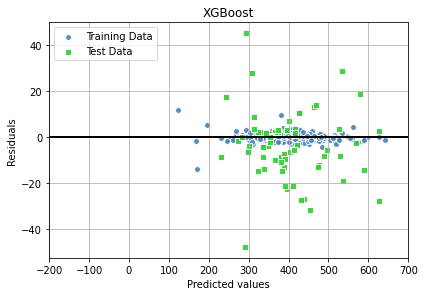

In [27]:
plt.scatter(y_train_pred4,
            y_train_pred4 - y_train,
            c= 'steelblue',
            edgecolor = 'white',
            marker = 'o',
            s = 35,
            alpha = 0.9,
            label = 'Training Data')

plt.scatter(y_test_pred4,
            y_test_pred4 - y_test,
            c = 'limegreen',
            edgecolor = 'white',
            marker = 's',
            s=35,
            alpha = 0.9,
            label = 'Test Data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-200,xmax=700,lw=2,color='black')
plt.xlim([-200,700])
plt.tight_layout()
plt.grid()
plt.title('XGBoost')
plt.show()

In [30]:
res_test =y_test_pred4-y_test
res_test = res_test.tolist()
list_of_tuples = list(zip(res_test,y_test))
outliers = pd.DataFrame(list_of_tuples,columns=['Residuals','Actual BP'])
outliers

,Residuals,Actual BP
0,-4.021765,353.15000
1,2.399251,371.53889
2,2.662108,325.47400
3,19.023293,560.02700
4,-8.754878,344.93600
...,...,...
60,1.754511,341.21900
61,-8.147251,537.46500
62,-19.137958,555.88100
63,8.867775,304.76400


In [41]:
outliers.loc[outliers.Residuals>40]

,Residuals,Actual BP
10,45.347885,248.015


In [42]:
df.loc[df.BP2==248.015]

,ID,Fuel,Class,Sub-Class,Group,BP2,Uncertainty,Source,SMILES,BP,Molecular Formula,N_Atoms,MW,IC0,PJ3,SIC0,GATS1v,Wiener,Z1,HOMO,LUMO,DM,EI,CP,H,BalabanJ,CIC3,GGI4,JGI1,Mor10v,Mor16se,GRAVH,HBondA,HBondD,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
92,93,Methylacetylene,Hydrocarbons,Aliphatic hydrocarbons,Alkynes,248.015,15.2025,NIST,CC#C,249.95,C3H4,7,40.065,0.985228,0.465948,0.350945,1.166667,4,6,-0.259467,0.061985,0.686964,0.321451,-0.098741,0.015165,1.632993,0.67927,0.0,0.25,-0.114906,-0.038053,244.751879,0,0,0,0,-6.27205,0.875,0.02836,-1.692481,-9.024915,4.454177,0.530176,0.51558


In [43]:
outliers.loc[outliers.Residuals<-40]

,Residuals,Actual BP
11,-47.83662,337.632


In [40]:
df.loc[df.BP2==337.632]

,ID,Fuel,Class,Sub-Class,Group,BP2,Uncertainty,Source,SMILES,BP,Molecular Formula,N_Atoms,MW,IC0,PJ3,SIC0,GATS1v,Wiener,Z1,HOMO,LUMO,DM,EI,CP,H,BalabanJ,CIC3,GGI4,JGI1,Mor10v,Mor16se,GRAVH,HBondA,HBondD,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG


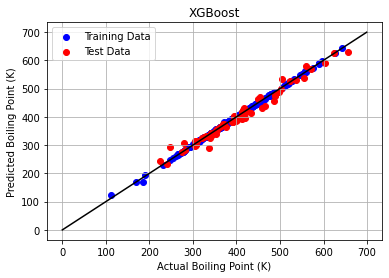

In [28]:
plt.scatter(y_train,y_train_pred4,color='blue',label='Training Data')
plt.scatter(y_test,y_test_pred4,color='red',label='Test Data')
plt.xlabel('Actual Boiling Point (K)')
plt.ylabel('Predicted Boiling Point (K)')
plt.legend(loc='upper left')
plt.grid()
plt.title('XGBoost')
plt.plot(range(700), range(700),'k')